# Бизнес цели
Игровые консоли крупное направление на рынке видеоигр (по данным аналитической компании NewZoo за 2022 год) около 28% рынка занимают видеоигры на стационарных и портативных консолях типа PlayStation, Xbox и Nintendo. В связи с пандемией COVID-19 и связанного с этим карантина, а также выходом нового поколения консолей PlayStation 5 и Xbox Series X/S спрос на приставки значительно вырос. Цель проекта, анализ продаж видеоигр используя алгоритмы машинного обучения **Logistic Regression   - Random Forest**, чтобы предсказать будет ли игра продана тиражом более 1 миллиона копий.


# Импортируем необходимые библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime
from pandas import Series
from math import ceil

# Изучение данных
Для изучения данных воспользуемся dataset который предоставляет актуальную   нформацию о продажах и популярности различных видеоигр по всему миру.
- Ссылка на исходный csv-файл. https://www.kaggle.com/datasets/xtyscut/video-games-sales-as-at-22-dec-2016csv?select=Video_Games_Sales_as_at_22_Dec_2016.csv



In [ ]:
df = pd.read_csv('/content/Video_Games_Sales_as_at_22_Dec_2016.csv', encoding="utf-8")
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


Данные включают название, платформу, год выпуска, жанр, издательство и продажи в Северной Америке, Европе, Японии и других регионах. Он также содержит оценки и рейтинги как критиков, так и пользователей, включая средний балл критиков, количество просмотренных критиков, средний балл пользователей, количество просмотренных пользователей, разработчика и рейтинг.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


Данные включают: 16 столбцов Название, Платформа, Год выпуска, Жанр, Издательство, продажи в Северной Америке, Европе, Японии и других регионах. Он также содержит оценки и рейтинги как критиков, так и пользователей, включая средний балл критиков, количество просмотренных критиков, средний балл пользователей, количество просмотренных пользователей, разработчика и рейтинг.

In [ ]:
df.shape

(16719, 16)

# Визуализация данных

**Лидирующие значения по Platform(s)** 

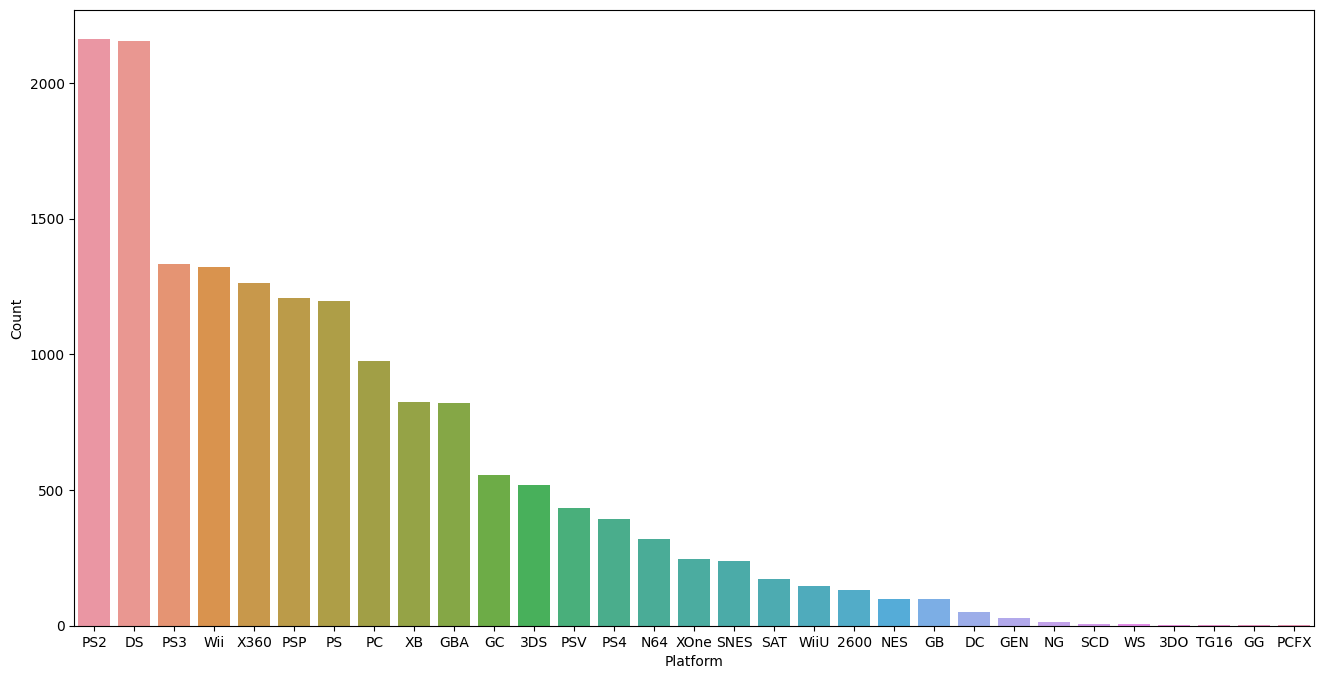

In [ ]:
fig = plt.figure(figsize=(16,8))
platforms = df['Platform'].value_counts()
# Создание диаграммы с Seaborn
sns.barplot(x=platforms.index, y=platforms.values)
plt.xlabel("Platform")
plt.ylabel("Count")
plt.show()

**Лидирующие значения по Genre(s)**

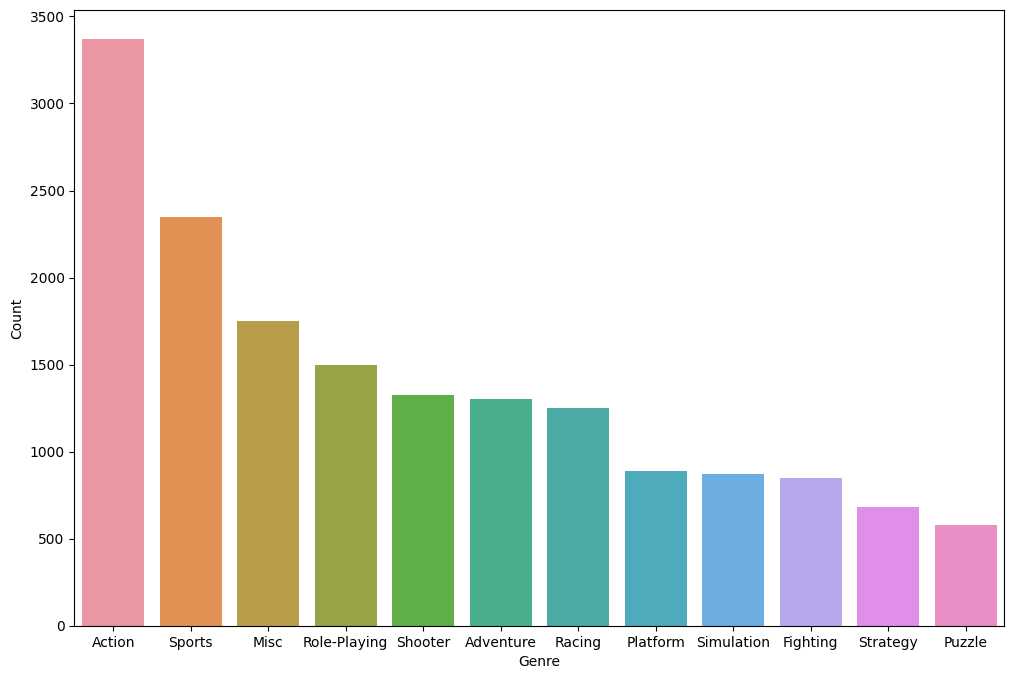

In [ ]:
fig = plt.figure(figsize=(12,8))
counts = df['Genre'].value_counts()
# Создание диаграммы с Seaborn
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()

# Корреляция набора данных


In [ ]:
df_cor = df
df_cor = df_cor.copy()

In [ ]:
cols = ['Platform', 'Genre', 'Publisher']
for col in cols:
    uniques = df_cor[col].value_counts().keys()
    uniques_dict = {}
    ct = 0
    for i in uniques:
        uniques_dict[i] = ct
        ct += 1

    for k, v in uniques_dict.items():
        df_cor.loc[df_cor[col] == k, col] = v

In [ ]:
dfa = df_cor[['Platform', 'Genre', 'Publisher', 'Year_of_Release', 'Critic_Score', 'Global_Sales']]
dfa = dfa.dropna().reset_index(drop=True)
dfa = dfa.astype('float64')

Axes(0.125,0.11;0.62x0.77)


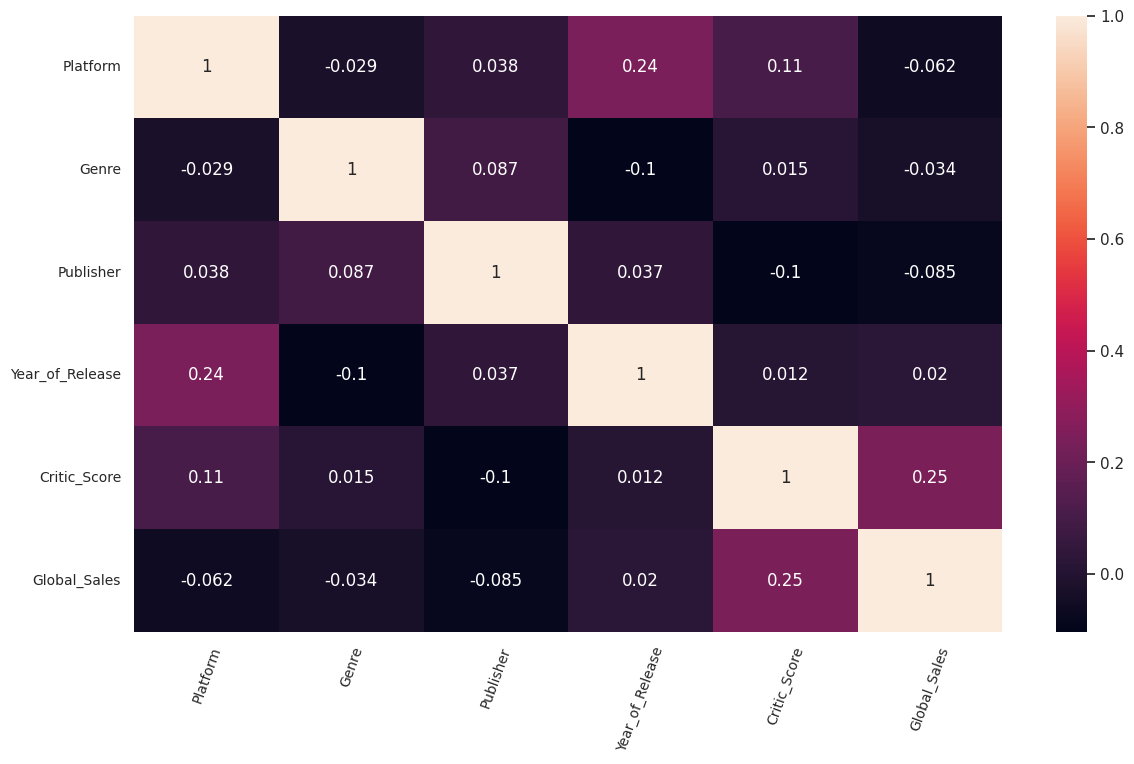

In [ ]:
sns.set(rc={'figure.figsize':(14,8)})
cor = sns.heatmap(dfa.corr(numeric_only = True), annot = True)
cor.set_yticklabels(cor.get_yticklabels(), rotation = 0, fontsize = 10)
cor.set_xticklabels(cor.get_xticklabels(), rotation = 70, fontsize = 10)
print(cor)

# Глобальные продажи и оценка критиков

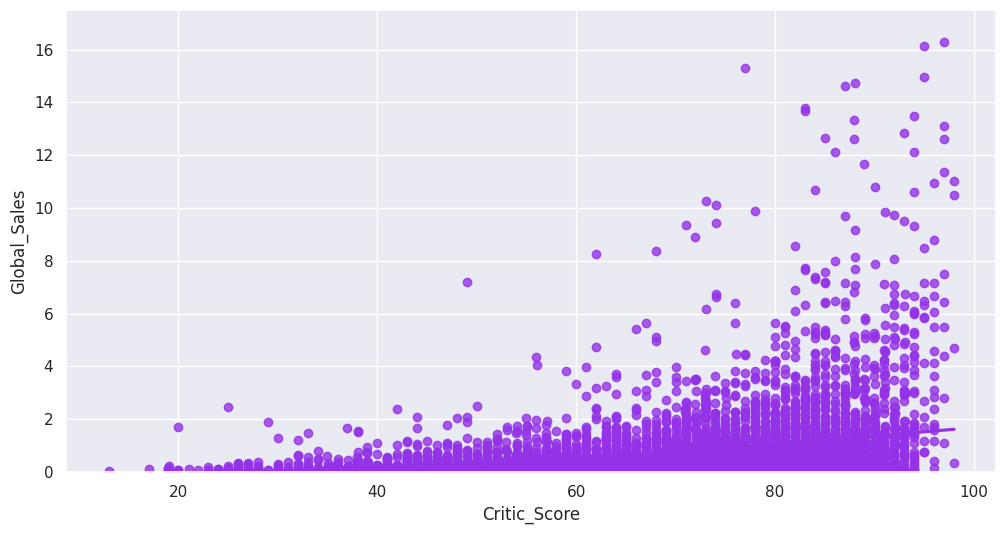

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
sns.regplot(x="Critic_Score", y="Global_Sales", data=df, ci=None, color="#9332e7", x_jitter=.02).set(ylim=(0, 17.5))
plt.show()

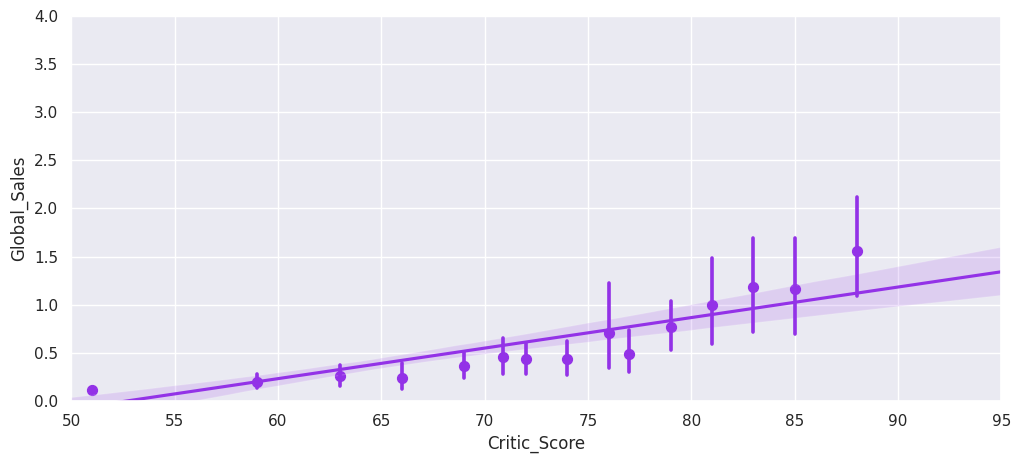

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.regplot(x="Critic_Score", y="Global_Sales", data=df.loc[df.Year_of_Release >= 2014],
            truncate=True, x_bins=15, color="#9332e7").set(ylim=(0, 4), xlim=(50, 95))
plt.show()

#  Подготовка данных 

**Проверка пропущенные значений в оснавном dataset**

In [ ]:
df.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

**Выборка необходимых столбцов, обработка пропущенных значений** 


In [ ]:
df2 = df[['Platform','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sales']]
#удаляет данные с отсутствующими значениями
df3 = df2.dropna().reset_index(drop=True)
df3['Hit'] = df3['Global_Sales']
df3.drop('Global_Sales', axis=1, inplace=True)

In [ ]:
def hit(sales):
    if sales >= 1:
        return 1
    else:
        return 0
# объявления анонимной функции
df3['Hit'] = df3['Hit'].apply(lambda x: hit(x))

In [ ]:
df3

,Platform,Genre,Publisher,Year_of_Release,Critic_Score,Hit
0,Wii,Sports,Nintendo,2006.0,76.0,1
1,Wii,Racing,Nintendo,2008.0,82.0,1
2,Wii,Sports,Nintendo,2009.0,80.0,1
3,DS,Platform,Nintendo,2006.0,89.0,1
4,Wii,Misc,Nintendo,2006.0,58.0,1
...,...,...,...,...,...,...
7977,PC,Shooter,Destineer,2011.0,61.0,0
7978,GC,Puzzle,Ubisoft,2003.0,53.0,0
7979,DS,Puzzle,Majesco Entertainment,2008.0,48.0,0
7980,PC,Strategy,Unknown,2011.0,60.0,0


In [ ]:
df3.isnull().sum()

Platform           0
Genre              0
Publisher          0
Year_of_Release    0
Critic_Score       0
Hit                0
dtype: int64

# Преобразование категориальных переменных в фиктивные переменные 

In [ ]:
from pandas import get_dummies

In [ ]:
df_dum = pd.get_dummies(df3)
df_dum.head()

,Year_of_Release,Critic_Score,Hit,Platform_3DS,Platform_DC,Platform_DS,Platform_GBA,Platform_GC,Platform_PC,Platform_PS,...,Publisher_Xplosiv,Publisher_Xseed Games,Publisher_Yacht Club Games,Publisher_Yuke's,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_id Software,Publisher_inXile Entertainment
0,2006.0,76.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2008.0,82.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2009.0,80.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2006.0,89.0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2006.0,58.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Моделирование


In [ ]:
from sklearn import svm
from sklearn import datasets
from sklearn.metrics import classification_report, f1_score, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Подготовка  данных, разделив их на обучающую и проверочную выборки (функция train_test_split())

In [ ]:
df4 = df_dum
y = df4['Hit']
X = df4.drop(['Hit'],axis=1)

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20)

# Оценка модели 
**Проверка точности предсказания**

# Random Forest
**Случайный лес** 

In [ ]:
model = RandomForestClassifier(random_state=2)
model.fit(Xtrain, ytrain)
y_pred_1 = model.predict_proba(Xtest)
print("Точность проверки: ", sum(pd.DataFrame(y_pred_1).idxmax(axis=1).values
                                   == ytest)/len(ytest))

Точность проверки:  0.8685034439574202


# LogisticRegression
**Логистическая регрессия**


In [ ]:
model_2 = LogisticRegression(max_iter=1000)
model_2.fit(Xtrain, ytrain)
y_pred_2 = model_2.predict(Xtest)
print("Точность проверки: ", sum(pd.DataFrame(y_pred_2).idxmax(axis=1).values 
                                   == ytest)/len(ytest))

Точность проверки:  0.8409517845961177


# Текстовый отчёт метрик классификации.

In [ ]:
all_predictions = model_2.predict(Xtest)
print(classification_report(ytest, all_predictions))

              precision    recall  f1-score   support

           0       0.88      0.97      0.93      1343
           1       0.68      0.32      0.44       254

    accuracy                           0.87      1597
   macro avg       0.78      0.65      0.68      1597
weighted avg       0.85      0.87      0.85      1597



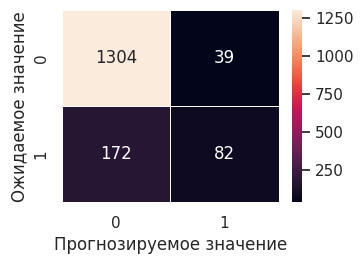

In [ ]:
fig, ax = plt.subplots(figsize=(3.5,2.5))
sns.heatmap(confusion_matrix(ytest, all_predictions), annot=True, linewidths=.5, ax=ax, fmt="d").set(xlabel='Прогнозируемое значение', ylabel='Ожидаемое значение')
plt.show()

# Внедрение.

Данная модель может быть интересна аналитикам и изданиям публикующим информацию о мире видео игр. Также возможно использовать модель с помощью чат бота для всех исследователей рынка компьютерных игр.